全国制覇まであと10都道府県です！


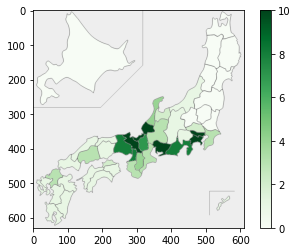

In [6]:
%matplotlib inline 
#↑Jupyter Notebookでmatplotlibを使うときに必要
import pandas as pd #データ読込に必要
import matplotlib.pyplot as plt #プロット作成に必要
from japanmap import picture

df = pd.read_excel('homon.xlsx', skiprows=3) #ファイルの先頭をその行数分スキップして読み込む
df = df[1:48].set_index('都道府県')

cmap = plt.get_cmap('Greens') #カラーマップ
norm = plt.Normalize(vmin=df.訪問回数.min(), vmax=df.訪問回数.max()) #訪問回数に基づく色の規格化
fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
#lambda：無名関数、bytes：バイト型データ生成、hex()：16進数変換
plt.colorbar(plt.cm.ScalarMappable(norm, cmap)) #カラーバー表示
plt.imshow(picture(df.訪問回数.apply(fcol)));

#訪問した都道府県数
visit = df[df['訪問回数'] > 0].count()
#未訪問の都道府県数
novisit1 = str(47 - visit) 
#数字の取り出し
novisit2 = novisit1[8:10]

#メッセージ
if int(novisit2) == 0:
    print('全国制覇おめでとうございます！')
else:
    print('全国制覇まであと' + novisit2 + '都道府県です！')
